# MNIST Machine Learning Project


***
## 1. Data Extraction

In [1]:
"""
Created on 30 Sep 2017

@author: Aamir
"""
%matplotlib inline

### Import Libraries

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

import scipy
from PIL import Image
from scipy import ndimage


## 2. Import and select relevant data 
### Get training datasets

In [3]:
### Loading training images
# Import data
os.chdir("D:/Workspace/Python/MNIST")
mnist = input_data.read_data_sets("./", one_hot=True)



Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.num_examples

55000

### Load images

In [5]:
X_train = np.transpose(mnist.train.images)
Y_train = np.transpose(mnist.train.labels)
X_test = np.transpose(mnist.test.images)
Y_test = np.transpose(mnist.test.labels)
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 55000
number of test examples = 10000
X_train shape: (784, 55000)
Y_train shape: (10, 55000)
X_test shape: (784, 10000)
Y_test shape: (10, 10000)


### Set variables

In [16]:
(n_x, m) = X_train.shape
n_y = Y_train.shape[0]
learning_rate = 0.0001
num_epochs = 150
minibatch_size = 32
print_cost = True
tf.set_random_seed(1)
seed = 3 
print(m,n_x,n_y)

55000 784 10


***
## 3. Create Model

### Create placeholder

In [7]:
X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
print(X,Y)

Tensor("Placeholder:0", shape=(784, ?), dtype=float32) Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32)


### Initialize parameters

In [8]:
tf.set_random_seed(1)   # so that your "random" numbers match ours

W1 = tf.get_variable("W1", [25,n_x], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [n_y,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [n_y,1], initializer = tf.zeros_initializer())


### Create model

In [9]:
# forward propagation
Z1 = tf.add(tf.matmul(W1,X),b1)             # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                         # A1 = relu(Z1)
Z2 = tf.add(tf.matmul(W2,A1),b2)            # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                         # A2 = relu(Z2)
Z3 = tf.add(tf.matmul(W3,A2),b3)    

# compute cost
logits = tf.transpose(Z3)
labels = tf.transpose(Y)
print(logits, labels)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

# backward propagation
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)




Tensor("transpose:0", shape=(?, 10), dtype=float32) Tensor("transpose_1:0", shape=(?, 10), dtype=float32)


### Run model

In [17]:
init = tf.global_variables_initializer()
costs = []  
sess = tf.Session()

# Run the initialization
sess.run(init)

# Do the training loop
for epoch in range(num_epochs):

    epoch_cost = 0.                       # Defines a cost related to an epoch
    num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
    seed = seed + 1
    #print(X_train.shape, Y_train.shape)
    minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

    for minibatch in minibatches:

        # Select a minibatch
        (minibatch_X, minibatch_Y) = minibatch

        # IMPORTANT: The line that runs the graph on a minibatch.
        # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
        ### START CODE HERE ### (1 line)
        _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
        ### END CODE HERE ###

        epoch_cost += minibatch_cost / num_minibatches

    # Print the cost every epoch
    if print_cost == True and epoch % 50 == 0:
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
    if print_cost == True and epoch % 5 == 0:
        costs.append(epoch_cost)


Cost after epoch 0: 1.426199
Cost after epoch 50: 0.104471
Cost after epoch 100: 0.066367


### Plot Loss Function

In [131]:
costs

[1.4261994614451272,
 0.2946081919697518,
 0.21887615347027384,
 0.18481174414073212,
 0.16398069167962892,
 0.14827458230709192,
 0.13582232233778749,
 0.12592120833149598,
 0.11763484466970579,
 0.11049992915885827,
 0.10447088085284095,
 0.09899560025349953,
 0.094227206806529684,
 0.089676846120299428,
 0.085720847128907804,
 0.081985136619671495,
 0.078453767408017197,
 0.075117734297855177,
 0.071958931529004247,
 0.069149977904451723,
 0.066366939262673369,
 0.063924367521695405,
 0.061248398610912198,
 0.058912358203037155,
 0.056504577046208163,
 0.054440300161063875,
 0.052466876439353556,
 0.05054966659734117,
 0.04861098695030043,
 0.046807715513455327]

In [132]:
np.squeeze(costs)

array([ 1.42619946,  0.29460819,  0.21887615,  0.18481174,  0.16398069,
        0.14827458,  0.13582232,  0.12592121,  0.11763484,  0.11049993,
        0.10447088,  0.0989956 ,  0.09422721,  0.08967685,  0.08572085,
        0.08198514,  0.07845377,  0.07511773,  0.07195893,  0.06914998,
        0.06636694,  0.06392437,  0.0612484 ,  0.05891236,  0.05650458,
        0.0544403 ,  0.05246688,  0.05054967,  0.04861099,  0.04680772])

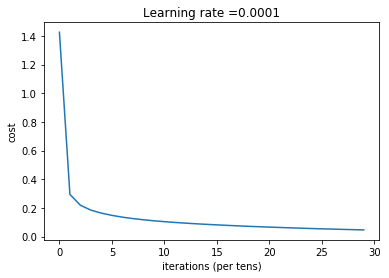

In [134]:
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

### Model Performance Evaluation 

In [33]:
parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

print ("Parameters have been trained!")
print(parameters)

Parameters have been trained!
{'W3': <tf.Variable 'W3:0' shape=(10, 12) dtype=float32_ref>, 'b1': <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>, 'W2': <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>, 'b3': <tf.Variable 'b3:0' shape=(10, 1) dtype=float32_ref>, 'b2': <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>, 'W1': <tf.Variable 'W1:0' shape=(25, 784) dtype=float32_ref>}


In [22]:

# Calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

# Calculate accuracy on the test set
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}, session=sess))
print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}, session=sess))


Train Accuracy: 0.988618
Test Accuracy: 0.9624


### Test own image

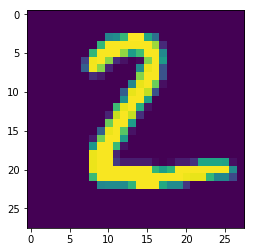

In [111]:
pic = X_test[:,1]
pic = pic.reshape(28,28)
pic.shape
plt.imshow(pic)

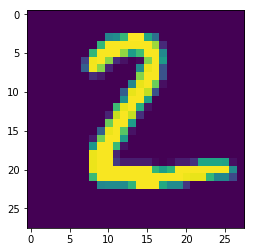

In [124]:
# We preprocess your image to fit your algorithm.
fname = "number-4.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
image = scipy.misc.imresize(pic, size=(28,28)) 
plt.imshow(image)

In [126]:
my_image = image.reshape((1, 28*28)).T
my_image.shape

(784, 1)

Tensor("Placeholder_27:0", shape=(784, 1), dtype=float32)
Your algorithm predicts: y = 2


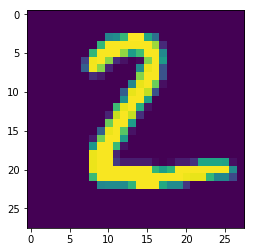

In [127]:

my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

### Predict Outcome

In [58]:
def predict(IMG, parameters):
    
#     W1 = tf.convert_to_tensor(parameters["W1"])
#     b1 = tf.convert_to_tensor(parameters["b1"])
#     W2 = tf.convert_to_tensor(parameters["W2"])
#     b2 = tf.convert_to_tensor(parameters["b2"])
#     W3 = tf.convert_to_tensor(parameters["W3"])
#     b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    #z3 = forward_propagation_for_predict(x, params)
    # MODEL
    X = tf.placeholder("float", [n_x, 1])
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    p = tf.argmax(Z3)
    
    print(X)
    #sess = tf.Session()
    prediction = sess.run(p, feed_dict = {X: IMG})
        
    return prediction

In [55]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
#     W3 = parameters['W3']
#     b3 = parameters['b3'] 

    
    return Z3
    

### Generate Random Mini-batches

In [24]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [25]:
print(X_train.shape, Y_train.shape)
batches=random_mini_batches(X_train,Y_train,mini_batch_size = 32, seed = 0)
A,B = batches[1]
print(A.shape, B.shape)

(784, 55000) (10, 55000)
(784, 32) (10, 32)
